In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import utils

**2.¿Cómo podemos modelar estadísticamente una función que combina características en "huellas dactilares"?**
* explorar corelaciones entre características (**Pearson**)
* explorar espacio de características multi-dimensional
	* **PCA** para reducir dimensiones, algoritmos de clustering

In [2]:
date = "1112"
df_flows = utils.get_flow_df(date)
df_flows_simple = utils.get_flow_df_simple(date)
df_packets = utils.get_packet_df(date)
df_packets_simple = utils.get_packet_df_simple(date)
df_flows_simple[["domain", "avg_read_bytes", "total_read_bytes", "max_read_burst_len", "avg_iat"]]

,domain,avg_read_bytes,total_read_bytes,max_read_burst_len,avg_iat
0,www.facebook.com,1081.000000,3243,3,0.002967
1,twitter.com,1556.888889,14012,3,0.012304
2,twitter.com,1750.500000,7002,2,0.000779
3,www.instagram.com,1166.666667,7000,3,0.000143
4,www.youtube.com,3385.600000,135424,2,0.043140
...,...,...,...,...,...
10123,www.facebook.com,1080.500000,6483,3,0.000318
10124,www.instagram.com,1167.000000,7002,3,0.005453
10125,www.facebook.com,1085.000000,6510,3,0.052422
10126,twitter.com,1751.500000,14012,2,0.034488


# PCA

In [3]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

### Flows

In [4]:
features = ["total_read_bytes", "avg_read_bytes", "avg_iat", "max_read_burst_len"]

# Separating out the features
x = df_flows_simple.loc[:, features]

# Separating out the target
y = df_flows_simple.loc[:,['domain']].values

# Standardizing the features
X = StandardScaler().fit_transform(x)
# X = pd.DataFrame(x_scaled, columns = x.columns)

type(X)

numpy.ndarray

**Project to 2D**
Find 2 principal eigenvectors (principal components)

In [5]:
pca = PCA(n_components=2)

principalComponents = pca.fit_transform(X)

principalDf = pd.DataFrame(data = principalComponents, columns = ['pc 1', 'pc 2'])
principalDf = principalDf.dropna()

In [6]:
finalDf = pd.concat([principalDf, df_flows_simple[['domain']]], axis = 1)
finalDf = finalDf.dropna()
finalDf

,pc 1,pc 2,domain
0,-0.881974,-0.049698,www.facebook.com
1,-0.414470,0.010890,twitter.com
2,-0.604395,0.047813,twitter.com
3,-0.775849,-0.057140,www.instagram.com
4,2.145585,0.258805,www.youtube.com
...,...,...,...
10123,-0.842289,-0.061405,www.facebook.com
10124,-0.774711,-0.036369,www.instagram.com
10125,-0.830168,0.142501,www.facebook.com
10126,-0.510537,0.176757,twitter.com


**Visualize**

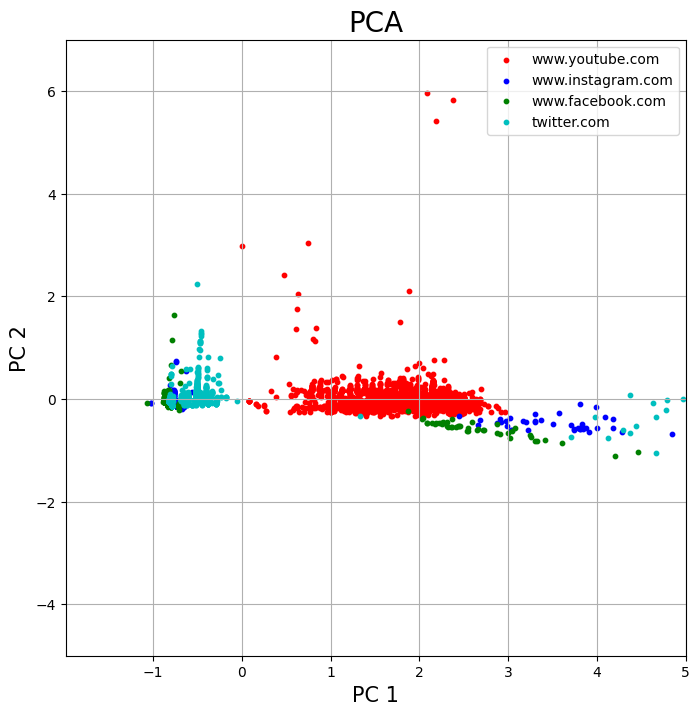

In [7]:
compare = ["www.youtube.com", "www.instagram.com", "www.facebook.com", "twitter.com"]
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('PC 1', fontsize = 15)
ax.set_ylabel('PC 2', fontsize = 15)
ax.set_title('PCA', fontsize = 20)

colors = ['r', 'b', "g", "c"]
for target, color in zip(compare, colors):
    indicesToKeep = finalDf['domain'] == target
    ax.scatter(finalDf.loc[indicesToKeep, "pc 1"], finalDf.loc[indicesToKeep, 'pc 2'], c = color, s = 10)
ax.legend(compare)
ax.set_ylim(-5, 7)
ax.set_xlim(right=5 )
ax.grid()

I don't get why PCA clusering fails.